In [3]:
!pip install pyttsx3 pyaudio pywhatkit

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install tensorflow spacy scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
#!python -m spacy download en_core_web_sm
!pip install speechrecognition

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import tkinter as tk
from tkinter import Entry, Button, PhotoImage
import speech_recognition as sr
import pyttsx3
import os
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
import spacy
import numpy as np
from tensorflow.keras.models import load_model
import threading

In [9]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

In [11]:

# Load pre-trained language model (GPT-2)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = TFGPT2LMHeadModel.from_pretrained("gpt2")

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [12]:
!pip install json

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [13]:
import json

In [14]:
with open('C:/Users/VAMSI/OneDrive/Desktop/chatbot.h5/tech.json', 'r') as file:
    data = json.load(file)

In [15]:
data

{'intents': [{'tag': 'aiml',
   'question': ['What is Artificial Intelligence (AI)?'],
   'answer': ['AI is the development of computer systems that can perform tasks requiring human intelligence.'],
   'context_set': ''},
  {'tag': 'b',
   'question': ['Explain the difference between narrow AI and general AI.'],
   'answer': ['Narrow AI is task-specific, while general AI has broad cognitive abilities.'],
   'context_set': ''},
  {'tag': 'c',
   'question': ['What are the main goals of AI?'],
   'answer': ['Goals of AI include automation, problem-solving, learning, perception, and language understanding.'],
   'context_set': ''},
  {'tag': 'd',
   'question': ['How does machine learning differ from traditional programming?'],
   'answer': ['ML learns from data patterns, while traditional programming uses explicit instructions.'],
   'context_set': ''},
  {'tag': 'e',
   'question': ['What is supervised learning in machine learning?'],
   'answer': ['Supervised learning involves trainin

In [20]:
# createing interface

import tkinter as tk
from tkinter import Entry, Button, PhotoImage
import speech_recognition as sr
import pyttsx3
import os
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import json

import threading

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load pre-trained language model (GPT-2)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# Load or collect data for training/fine-tuning (replace with your actual data loading)
with open('C:/Users/VAMSI/OneDrive/Desktop/chatbot.h5/tech.json', 'r') as file:
    data = json.load(file)

class ChatbotApp:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title(f"NLPAssistant")
        self.root.geometry('800x600')
        self.root.resizable(False, False)
        self.message = tk.StringVar()

        self.textcon = tk.Text(self.root, bd=1, bg='white', width=50, height=8)
        self.textcon.pack(fill="both", expand=True)

        self.mes_win = Entry(self.root, width=30, xscrollcommand=True, textvariable=self.message)
        self.mes_win.place(x=1, y=540, height=60, width=579)
        self.mes_win.focus()

        self.textcon.config(fg='black')
        self.textcon.tag_config('usr', foreground='black')
        self.textcon.insert(tk.END, "NLPAssistant : This is Friday! Your Assistant.\n\n")

        self.exit_list = ['goodbye', 'bye', 'off']

        self.button_send = Button(self.root, text='Send', bg='dark green', activebackground='grey',
                                  command=self.send_msz, width=12, height=5, font=('Arial'))
        self.button_send.place(x=690, y=540, height=60, width=110)

        mic_image_path = "mic.png"
        if os.path.exists(mic_image_path):
            self.mic_image = PhotoImage(file=mic_image_path).subsample(2, 3)
        else:
            print(f"Error: Mic image not found at {mic_image_path}")
            self.mic_image = None

        self.root.bind('<Return>', self.send_msz)
        self.root.mainloop()

    def send_msz(self, event=None):
        usr_input = self.message.get()
        usr_input = usr_input.lower()
        self.textcon.insert(tk.END, f'You : {usr_input}' + '\n', 'usr')

        if usr_input.lower() == "end ":
            self.textcon.config(fg='black')
            self.textcon.insert(tk.END, "NLPAssistant : Thank You sir, I hope I assisted you properly \n")
            return self.root.destroy()

        else:
            self.textcon.config(fg='black')
            response = self.handle_user_input(usr_input)
            self.textcon.insert(tk.END, f"NLPAssistant: {response}\n")
            self.mes_win.delete(0, tk.END)

    def activate_mic_and_send(self):
        self.activate_mic()
        self.send_msz()

    def activate_mic(self):
        # Replace this with your logic for activating the microphone
        engine = pyttsx3.init()
        rate = engine.getProperty('rate')
        engine.setProperty('rate', 170)
        voices = engine.getProperty('voices')
        engine.setProperty('voice', voices[1].id)
        r = sr.Recognizer()
        with sr.Microphone() as source:
            r.energy_threshold = 400
            r.adjust_for_ambient_noise(source, 1.2)
            print("Listening to You sir : ")
            audio = r.listen(source)
            text = r.recognize_google(audio)
            print("You Told : "+text)

            # Handle the user input (speech-to-text)
            response = self.handle_user_input(text)
            self.textcon.insert(tk.END, f"NLPAssistant: {response}\n")

    def handle_user_input(self, user_input):
        user_keywords = self.extract_keywords(user_input)

        for example in data["intents"]:
            if "question" in example:
                question_keywords = [keyword for q in example["question"] for keyword in self.extract_keywords(q)]

                if all(keyword in question_keywords for keyword in user_keywords):
                    answer = example.get("answer", [])
                    return f"Answer from JSON file: {answer}"

        input_ids = tokenizer.encode(user_input, return_tensors="tf")
        output = gpt_model.generate(input_ids, max_length=150, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95,
                                    temperature=0.7)
        bot_response = tokenizer.decode(output[0], skip_special_tokens=True)

        # Adjust the response based on the user's technical ability
        technical_ability = "tech"  # You need to get this value from somewhere
        if technical_ability == "tech":
            # Customize response for technical users
            pass
        else:
            # Customize response for non-technical users
            pass

        candidate_answers = ["Your first answer", "Your second answer", "Your third answer"]
        relevancy_scores = self.score_relevancy(user_input, candidate_answers)

        # Store or update relevancy scores for future learning
        # Update your model based on user feedback and learning algorithm

        return bot_response

    def extract_keywords(self, text):
        doc = nlp(text)
        return [token.text.lower() for token in doc if token.is_alpha]

    def score_relevancy(self, user_input, candidate_answers):
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform([user_input] + candidate_answers)
        similarity_matrix = cosine_similarity(vectors)
        relevancy_scores = similarity_matrix[0][1:]
        return relevancy_scores

if __name__ == "__main__":
    chatbot_app = ChatbotApp()

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
# creating interface with mic not respond the mic

import tkinter as tk
from tkinter import Entry, Button, PhotoImage
import speech_recognition as sr
import pyttsx3
import os
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import json
import threading

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load pre-trained language model (GPT-2)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# Load or collect data for training/fine-tuning (replace with your actual data loading)
with open('C:/Users/VAMSI/OneDrive/Desktop/chatbot.h5/tech.json', 'r') as file:
    data = json.load(file)

class ChatbotApp:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title(f"NLPAssistant")
        self.root.geometry('1000x800')  # Increased dimensions
        self.root.resizable(False, False)
        self.message = tk.StringVar()

        self.textcon = tk.Text(self.root, bd=1, bg='white', width=70, height=15)  # Adjusted dimensions
        self.textcon.pack(fill="both", expand=True)

        self.mes_win = Entry(self.root, width=50, xscrollcommand=True, textvariable=self.message)
        self.mes_win.place(x=1, y=720, height=60, width=679)  # Adjusted dimensions
        self.mes_win.focus()

        self.textcon.config(fg='black')
        self.textcon.tag_config('usr', foreground='black')
        self.textcon.insert(tk.END, "NLPAssistant : This is Friday! Your Assistant.\n\n")

        self.exit_list = ['goodbye', 'bye', 'off']

        mic_image_path = "mic.png"
        if os.path.exists(mic_image_path):
            self.mic_image = PhotoImage(file=mic_image_path).subsample(2, 3)
        else:
            print(f"Error: Mic image not found at {mic_image_path}")
            self.mic_image = None

        self.mic_button = Button(self.root, text='Mic', bg='blue', activebackground='white',
                                 command=self.activate_mic, width=12, height=2, font=('Arial'))
        self.mic_button.place(x=800, y=720, height=60, width=110)  # Adjusted dimensions

        self.send_button = Button(self.root, text='Send', bg='dark green', activebackground='grey',
                                   command=self.send_msz, width=12, height=2, font=('Arial'))
        self.send_button.place(x=680, y=720, height=60, width=110)  # Adjusted dimensions

        self.root.bind('<Return>', self.send_msz)
        self.root.mainloop()

    def send_msz(self, event=None):
        usr_input = self.message.get()
        usr_input = usr_input.lower()
        self.textcon.insert(tk.END, f'You : {usr_input}' + '\n', 'usr')

        if usr_input.lower() in ["goodbye", "bye"]:
            self.textcon.config(fg='black')
            self.textcon.insert(tk.END, "NLPAssistant : Thank You sir, I hope I assisted you properly \n")
            return self.root.destroy()

        else:
            self.textcon.config(fg='black')
            response = self.handle_user_input(usr_input)
            self.textcon.insert(tk.END, f"NLPAssistant: {response}\n")
            self.mes_win.delete(0, tk.END)

    def activate_mic(self):
        if self.mic_image:
            self.mic_button.config(image=self.mic_image)
        else:
            self.mic_button.config(text="Mic")

        # Replace this with your logic for activating the microphone
        engine = pyttsx3.init()
        rate = engine.getProperty('rate')
        engine.setProperty('rate', 170)
        voices = engine.getProperty('voices')
        engine.setProperty('voice', voices[1].id)
        r = sr.Recognizer()
        with sr.Microphone() as source:
            r.energy_threshold = 400
            r.adjust_for_ambient_noise(source, 1.2)
            self.textcon.insert(tk.END, "NLPAssistant: Listening... \n")  # Display listening message in textcon
            audio = r.listen(source)
            text = r.recognize_google(audio)
            self.textcon.insert(tk.END, f"You : {text}\n", 'usr')  # Display user's input in textcon

            # Handle the user input (speech-to-text)
            response = self.handle_user_input(text)
            self.textcon.insert(tk.END, f"NLPAssistant: {response}\n")

    def handle_user_input(self, user_input):
        user_keywords = self.extract_keywords(user_input)

        for example in data["intents"]:
            if "question" in example:
                question_keywords = [keyword for q in example["question"] for keyword in self.extract_keywords(q)]

                if all(keyword in question_keywords for keyword in user_keywords):
                    answer = example.get("answer", [])
                    return f"Answer from JSON file: {answer}"

        input_ids = tokenizer.encode(user_input, return_tensors="tf")
        output = gpt_model.generate(input_ids, max_length=150, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95,
                                    temperature=0.7)
        bot_response = tokenizer.decode(output[0], skip_special_tokens=True)

        # Adjust the response based on the user's technical ability
        technical_ability = "tech"  # You need to get this value from somewhere
        if technical_ability == "tech":
            # Customize response for technical users
            pass
        else:
            # Customize response for non-technical users
            pass

        candidate_answers = ["Your first answer", "Your second answer", "Your third answer"]
        relevancy_scores = self.score_relevancy(user_input, candidate_answers)

        # Store or update relevancy scores for future learning
        # Update your model based on user feedback and learning algorithm

        return bot_response

    def extract_keywords(self, text):
        doc = nlp(text)
        return [token.text.lower() for token in doc if token.is_alpha]

    def score_relevancy(self, user_input, candidate_answers):
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform([user_input] + candidate_answers)
        similarity_matrix = cosine_similarity(vectors)
        relevancy_scores = similarity_matrix[0][1:]
        return relevancy_scores

if __name__ == "__main__":
    chatbot_app = ChatbotApp()


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
C:\Users\VAMSI\AppData\Roaming\Python\Python39\site-packages\transformers\generation\configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\VAMSI\AppData\Roaming\Python\Python39\site-packages\transformers\generation\configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id w

In [19]:
#working code 1 
import tkinter as tk
from tkinter import Entry, Button, PhotoImage
import speech_recognition as sr
import pyttsx3
import os
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import json
import threading
import webbrowser

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load pre-trained language model (GPT-2)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# Load or collect data for training/fine-tuning (replace with your actual data loading)
with open('C:/Users/VAMSI/OneDrive/Desktop/chatbot.h5/tech.json', 'r') as file:
    data = json.load(file)

class ChatbotApp:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title(f"NLPAssistant")
        self.root.geometry('1000x800')  # Increased dimensions
        self.root.resizable(False, False)
        self.message = tk.StringVar()

        self.textcon = tk.Text(self.root, bd=1, bg='white', width=70, height=15)  # Adjusted dimensions
        self.textcon.pack(fill="both", expand=True)

        self.mes_win = Entry(self.root, width=50, xscrollcommand=True, textvariable=self.message)
        self.mes_win.place(x=1, y=720, height=60, width=679)  # Adjusted dimensions
        self.mes_win.focus()

        self.textcon.config(fg='black')
        self.textcon.tag_config('usr', foreground='black')
        self.textcon.insert(tk.END, "NLPAssistant : This is Friday! Your Assistant.\n\n")

        self.exit_list = ['goodbye', 'bye', 'off']

        mic_image_path = "mic.png"
        if os.path.exists(mic_image_path):
            self.mic_image = PhotoImage(file=mic_image_path).subsample(2, 3)
        else:
            print(f"Error: Mic image not found at {mic_image_path}")
            self.mic_image = None

        self.mic_button = Button(self.root, text='Mic', bg='blue', activebackground='white',
                                 command=self.activate_mic, width=12, height=2, font=('Arial'))
        self.mic_button.place(x=800, y=720, height=60, width=110)  # Adjusted dimensions

        self.send_button = Button(self.root, text='Send', bg='dark green', activebackground='grey',
                                   command=self.send_msz, width=12, height=2, font=('Arial'))
        self.send_button.place(x=680, y=720, height=60, width=110)  # Adjusted dimensions

        self.root.bind('<Return>', self.send_msz)
        self.engine = pyttsx3.init()
        self.root.mainloop()

    def send_msz(self, event=None):
        usr_input = self.message.get()
        usr_input = usr_input.lower()
        self.textcon.insert(tk.END, f'You : {usr_input}' + '\n', 'usr')

        if usr_input.lower() in ["goodbye", "bye"]:
            self.textcon.config(fg='black')
            response = "Thank You sir, I hope I assisted you properly"
            self.textcon.insert(tk.END, f"NLPAssistant : {response}\n")
            self.speak(response)
            return self.root.destroy()

        else:
            self.textcon.config(fg='black')
            response = self.handle_user_input(usr_input)
            self.textcon.insert(tk.END, f"NLPAssistant: {response}\n")
            # Speak only if the input is from the microphone
            if self.input_source == 'mic':
                self.speak(response)
            self.mes_win.delete(0, tk.END)

    def activate_mic(self):
        if self.mic_image:
            self.mic_button.config(image=self.mic_image)
        else:
            self.mic_button.config(text="Mic")

        engine = pyttsx3.init()
        rate = engine.getProperty('rate')
        engine.setProperty('rate', 170)
        voices = engine.getProperty('voices')
        engine.setProperty('voice', voices[1].id)
        r = sr.Recognizer()
        with sr.Microphone() as source:
            r.energy_threshold = 400
            r.adjust_for_ambient_noise(source, 1.2)
            self.textcon.insert(tk.END, "NLPAssistant: Listening... \n")  # Display listening message in textcon
            audio = r.listen(source)
            text = r.recognize_google(audio)
            self.textcon.insert(tk.END, f"You (Mic): {text}\n", 'usr')  # Display user's input in textcon
            self.input_source = 'mic'

            # Handle the user input (speech-to-text)
            response = self.handle_user_input(text)
            self.textcon.insert(tk.END, f"NLPAssistant: {response}\n")
            self.speak(response)

    def speak(self, text):
        self.engine.say(text)
        self.engine.runAndWait()

    def handle_user_input(self, user_input):
        user_keywords = self.extract_keywords(user_input)

        # Check if the user wants to open a specific website
        if "open" in user_keywords and any(keyword in user_keywords for keyword in ["youtube"]):
            self.open_website(user_input)
            return "Opening in YouTube..."

        # Check if the user wants to search on Wikipedia
        if "search" in user_keywords and "for" in user_keywords:
            self.search_wikipedia(user_input)
            return "Searching on Wikipedia..."

        # Continue with the existing logic for other responses
        for example in data.get("intents", []):
            if "question" in example:
                question_keywords = [keyword for q in example["question"] for keyword in self.extract_keywords(q)]

                if all(keyword in question_keywords for keyword in user_keywords):
                    answer = example.get("answer", [])
                    return f"{answer}"

        input_ids = tokenizer.encode(user_input, return_tensors="tf")
        output = gpt_model.generate(input_ids, max_length=150, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95,
                                    temperature=0.7)
        bot_response = tokenizer.decode(output[0], skip_special_tokens=True)

        # Adjust the response based on the user's technical ability
        technical_ability = "tech"  # You need to get this value from somewhere
        if technical_ability == "tech":
            # Customize response for technical users
            pass
        else:
            # Customize response for non-technical users
            pass

        candidate_answers = ["Your first answer", "Your second answer", "Your third answer"]
        relevancy_scores = self.score_relevancy(user_input, candidate_answers)

        # Store or update relevancy scores for future learning
        # Update your model based on user feedback and learning algorithm

        return bot_response

    def extract_keywords(self, text):
        doc = nlp(text)
        return [token.text.lower() for token in doc if token.is_alpha]

    def score_relevancy(self, user_input, candidate_answers):
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform([user_input] + candidate_answers)
        similarity_matrix = cosine_similarity(vectors)
        relevancy_scores = similarity_matrix[0][1:]
        return relevancy_scores

    def open_website(self, user_input):
        # Extract the website name from the user input
        website_name = next((word for word in user_input.split() if word.lower() in ["youtube"]), None)

        if website_name:
            # Open the specified website in the default web browser
            url = f"https://www.{website_name}.com"
            webbrowser.open(url)

    def search_wikipedia(self, user_input):
        # Extract the search query from the user input
        search_query = user_input.split("for", 1)[-1].strip()

        if search_query:
            # Search the query on Wikipedia
            url = f"https://en.wikipedia.org/wiki/Special:Search?search={search_query}"
            webbrowser.open(url)

if __name__ == "__main__":
    chatbot_app = ChatbotApp()


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\VAMSI\AppData\Local\Temp\ipykernel_11228\3750290513.py", line 104, in activate_mic
    text = r.recognize_google(audio)
  File "C:\Users\VAMSI\AppData\Roaming\Python\Python39\site-packages\speech_recognition\recognizers\google.py", line 251, in recognize_legacy
    return output_parser.parse(response_text)
  File "C:\Users\VAMSI\AppData\Roaming\Python\Python39\site-packages\speech_recognition\recognizers\google.py", line 124, in parse
    actual_result = self.convert_to_result(response_text)

In [9]:
#working code 2 with updations
import tkinter as tk
from tkinter import Entry, Button, PhotoImage
import speech_recognition as sr
import pyttsx3
import os
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import json
import threading
from datetime import datetime

# Add the following import at the beginning of the file
from speech_recognition import UnknownValueError

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load pre-trained language model (GPT-2)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# Load or collect data for training/fine-tuning (replace with your actual data loading)
with open('C:/Users/VAMSI/OneDrive/Desktop/chatbot.h5/tech.json', 'r') as file:
    data = json.load(file)

class ChatbotApp:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title(f"NLPAssistant")
        self.root.geometry('1000x800')  # Increased dimensions
        self.root.resizable(False, False)
        self.message = tk.StringVar()
        self.is_listening = False
        self.greeted = False

        self.textcon = tk.Text(self.root, bd=1, bg='white', width=70, height=15)  # Adjusted dimensions
        self.textcon.pack(fill="both", expand=True)

        self.mes_win = Entry(self.root, width=50, xscrollcommand=True, textvariable=self.message)
        self.mes_win.place(x=1, y=720, height=60, width=679)  # Adjusted dimensions
        self.mes_win.focus()

        self.textcon.config(fg='black')
        self.textcon.tag_config('usr', foreground='black')
        self.textcon.insert(tk.END, "NLPAssistant : This is Friday! Your Assistant.\n\n")

        self.exit_list = ['goodbye', 'bye', 'off']

        mic_image_path = "mic.png"
        if os.path.exists(mic_image_path):
            self.mic_image = PhotoImage(file=mic_image_path).subsample(2, 3)
        else:
            print(f"Error: Mic image not found at {mic_image_path}")
            self.mic_image = None

        self.mic_button = Button(self.root, text='Mic', bg='blue', activebackground='white',
                                 command=self.activate_mic, width=12, height=2, font=('Arial'))
        self.mic_button.place(x=800, y=720, height=60, width=110)  # Adjusted dimensions

        self.send_button = Button(self.root, text='Send', bg='dark green', activebackground='grey',
                                   command=self.send_msz, width=12, height=2, font=('Arial'))
        self.send_button.place(x=680, y=720, height=60, width=110)  # Adjusted dimensions

        self.root.bind('<Return>', self.send_msz)
        self.engine = pyttsx3.init()
        self.root.mainloop()

    def send_msz(self, event=None):
        usr_input = self.message.get()
        usr_input = usr_input.lower()
        self.textcon.insert(tk.END, f'You : {usr_input}' + '\n', 'usr')

        if usr_input.lower() in ["goodbye", "bye"]:
            self.textcon.config(fg='black')
            response = "Thank You sir, I hope I assisted you properly"
            self.textcon.insert(tk.END, f"NLPAssistant : {response}\n")
            self.speak(response)
            return self.root.destroy()

        else:
            self.textcon.config(fg='black')
            response = self.handle_user_input(usr_input)
            self.textcon.insert(tk.END, f"NLPAssistant: {response}\n")
            # Speak only if the input is from the microphone
            if hasattr(self, 'input_source') and self.input_source == 'mic':
                self.speak(response)
            self.mes_win.delete(0, tk.END)

    def activate_mic(self):
        if self.mic_image:
            self.mic_button.config(image=self.mic_image)
        else:
            self.mic_button.config(text="Mic")

        self.is_listening = True
        threading.Thread(target=self.listen_continuously).start()

    def listen_continuously(self):
        r = sr.Recognizer()

        while self.is_listening:
            if not self.greeted:
                self.greeted = True
                self.speak("Hello sir! I am your Friday.")
                current_time = datetime.now().strftime("%I:%M %p")
                self.speak(f"The current time is {current_time}")

            engine = pyttsx3.init()
            rate = engine.getProperty('rate')
            engine.setProperty('rate', 170)
            voices = engine.getProperty('voices')
            engine.setProperty('voice', voices[1].id)

            with sr.Microphone() as source:
                r.energy_threshold = 400
                r.adjust_for_ambient_noise(source, 1.2)
                self.textcon.insert(tk.END, "NLPAssistant: Listening... \n")  # Display listening message in textcon

                try:
                    audio = r.listen(source)
                    text = r.recognize_google(audio)
                    self.textcon.insert(tk.END, f"You (Mic): {text}\n", 'usr')  # Display user's input in textcon
                    self.input_source = 'mic'

                    # Handle the user input (speech-to-text)
                    response = self.handle_user_input(text)
                    self.textcon.insert(tk.END, f"NLPAssistant: {response}\n")
                    if self.input_source == 'mic':
                        self.speak(response)

                except UnknownValueError:
                    print("NLPAssistant: Sorry, I could not understand the audio. Please try again.")

                except sr.RequestError as e:
                    print(f"NLPAssistant: There was an error with the speech recognition service: {e}")

    def speak(self, text):
        self.engine.say(text)
        self.engine.runAndWait()

    def handle_user_input(self, user_input):
        user_keywords = self.extract_keywords(user_input)

        for example in data.get("intents", []):
            if "question" in example:
                question_keywords = [keyword for q in example["question"] for keyword in self.extract_keywords(q)]

                if all(keyword in question_keywords for keyword in user_keywords):
                    answer = example.get("answer", [])
                    return f"{answer}"

        input_ids = tokenizer.encode(user_input, return_tensors="tf")
        output = gpt_model.generate(input_ids, max_length=150, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95,
                                    temperature=0.7)
        bot_response = tokenizer.decode(output[0], skip_special_tokens=True)

        # Adjust the response based on the user's technical ability
        technical_ability = "tech"  # You need to get this value from somewhere
        if technical_ability == "tech":
            # Customize response for technical users
            pass
        else:
            # Customize response for non-technical users
            pass

        candidate_answers = ["Your first answer", "Your second answer", "Your third answer"]
        relevancy_scores = self.score_relevancy(user_input, candidate_answers)

        # Store or update relevancy scores for future learning
        # Update your model based on user feedback and learning algorithm

        return bot_response

    def extract_keywords(self, text):
        doc = nlp(text)
        return [token.text.lower() for token in doc if token.is_alpha]

    def score_relevancy(self, user_input, candidate_answers):
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform([user_input] + candidate_answers)
        similarity_matrix = cosine_similarity(vectors)
        relevancy_scores = similarity_matrix[0][1:]
        return relevancy_scores

if __name__ == "__main__":
    chatbot_app = ChatbotApp()


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
Exception in thread Thread-68:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VAMSI\AppData\Local\Temp\ipykernel_16356\419094936.py", line 130, in listen_continuously
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 3743, in insert
    self.tk.call((self._w, 'insert', index, chars) + args)
RuntimeError: main thread is not in main loop
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pas

NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.
NLPAssistant: Sorry, I could not understand the audio. Please try again.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


NLPAssistant: Sorry, I could not understand the audio. Please try again.


Exception in thread Thread-75:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VAMSI\AppData\Local\Temp\ipykernel_16356\419094936.py", line 120, in listen_continuously
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 3743, in insert
    self.tk.call((self._w, 'insert', index, chars) + args)
RuntimeError: main thread is not in main loop


In [17]:
pip install googletrans==4.0.0-rc1

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
# working 4 with translate options in the UI
import tkinter as tk
from tkinter import Entry, Button, PhotoImage, Listbox
import speech_recognition as sr
import pyttsx3
import os
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import json
import threading
from googletrans import Translator
from datetime import datetime

# Add the following import at the beginning of the file
from speech_recognition import UnknownValueError

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load pre-trained language model (GPT-2)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# Load or collect data for training/fine-tuning (replace with your actual data loading)
with open('C:/Users/VAMSI/OneDrive/Desktop/chatbot.h5/tech.json', 'r') as file:
    data = json.load(file)

class ChatbotApp:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title(f"chitti")
        self.root.geometry('1000x800')  # Increased dimensions
        self.root.resizable(False, False)
        self.message = tk.StringVar()
        self.is_listening = False
        self.greeted = False
        self.selected_language = None

        self.textcon = tk.Text(self.root, bd=1, bg='white', width=70, height=15)  # Adjusted dimensions
        self.textcon.pack(fill="both", expand=True)

        self.mes_win = Entry(self.root, width=50, xscrollcommand=True, textvariable=self.message)
        self.mes_win.place(x=1, y=720, height=60, width=679)  # Adjusted dimensions
        self.mes_win.focus()

        self.textcon.config(fg='black')
        self.textcon.tag_config('usr', foreground='black')
        self.textcon.insert(tk.END, "chitti : This is chitti! Your Assistant.\n\n")

        self.exit_list = ['goodbye', 'bye', 'off']

        mic_image_path = "mic.png"
        if os.path.exists(mic_image_path):
            self.mic_image = PhotoImage(file=mic_image_path).subsample(2, 3)
        else:
            print(f"Error: Mic image not found at {mic_image_path}")
            self.mic_image = None

        self.mic_button = Button(self.root, text='Mic', bg='blue', activebackground='white',
                                 command=self.activate_mic, width=12, height=2, font=('Arial'))
        self.mic_button.place(x=800, y=720, height=60, width=110)  # Adjusted dimensions

        self.send_button = Button(self.root, text='Send', bg='pink', activebackground='grey',
                                   command=self.send_msz, width=12, height=2, font=('Arial'))
        self.send_button.place(x=680, y=720, height=60, width=110)  # Adjusted dimensions

        self.language_listbox = Listbox(self.root, selectmode=tk.SINGLE, exportselection=False)
        self.language_listbox.place(x=920, y=720, height=60, width=80)
        self.language_listbox.insert(1, "Telugu")
        self.language_listbox.insert(2, "Kannada")
        self.language_listbox.insert(3, "Tamil")
        self.language_listbox.insert(4, "Hindi")
        self.language_listbox.select_set(0)

        self.root.bind('<Return>', self.send_msz)
        self.engine = pyttsx3.init()
        self.translator = Translator()
        self.root.mainloop()

    def send_msz(self, event=None):
        usr_input = self.message.get()
        usr_input = usr_input.lower()
        self.textcon.insert(tk.END, f'You : {usr_input}' + '\n', 'usr')

        if usr_input.lower() in ["goodbye", "bye"]:
            self.textcon.config(fg='black')
            response = "Thank You sir, I hope I assisted you properly"
            self.textcon.insert(tk.END, f"chitti : {response}\n")
            self.speak(response)
            return self.root.destroy()

        elif "translate" in usr_input:
            self.speak("Sure, I can help with translation. Please select a language option.")
            self.selected_language = self.language_listbox.get(tk.ACTIVE).lower()

        else:
            self.textcon.config(fg='black')
            response = self.handle_user_input(usr_input)
            self.textcon.insert(tk.END, f"chitti: {response}\n")
            # Speak only if the input is from the microphone and not a translation request
            if hasattr(self, 'input_source') and self.input_source == 'mic' and not self.selected_language:
                self.speak(response)
            self.mes_win.delete(0, tk.END)

    def activate_mic(self):
        if self.mic_image:
            self.mic_button.config(image=self.mic_image)
        else:
            self.mic_button.config(text="Mic")

        self.is_listening = True
        threading.Thread(target=self.listen_continuously).start()

    def listen_continuously(self):
        r = sr.Recognizer()

        while self.is_listening:
            if not self.greeted:
                self.greeted = True
                self.speak("Hello sir! I am your chitti.")
                current_time = datetime.now().strftime("%I:%M %p")
                self.speak(f"The current time is {current_time}")

            engine = pyttsx3.init()
            rate = engine.getProperty('rate')
            engine.setProperty('rate', 170)
            voices = engine.getProperty('voices')
            engine.setProperty('voice', voices[1].id)

            with sr.Microphone() as source:
                r.energy_threshold = 400
                r.adjust_for_ambient_noise(source, 1.2)
                self.textcon.insert(tk.END, "chitti: Listening... \n")  # Display listening message in textcon

                try:
                    audio = r.listen(source)
                    text = r.recognize_google(audio)
                    self.textcon.insert(tk.END, f"You (Mic): {text}\n", 'usr')  # Display user's input in textcon
                    self.input_source = 'mic'

                    # Handle the user input (speech-to-text)
                    response = self.handle_user_input(text)
                    self.textcon.insert(tk.END, f"chitti: {response}\n")
                    if self.input_source == 'mic' and not self.selected_language:
                        self.speak(response)

                except UnknownValueError:
                    print("chitti: Sorry, I could not understand the audio. Please try again.")

                except sr.RequestError as e:
                    print(f"chitti: There was an error with the speech recognition service: {e}")

    def speak(self, text):
        self.engine.say(text)
        self.engine.runAndWait()

    def handle_user_input(self, user_input):
        user_keywords = self.extract_keywords(user_input)

        for example in data.get("intents", []):
            if "question" in example:
                question_keywords = [keyword for q in example["question"] for keyword in self.extract_keywords(q)]

                if all(keyword in question_keywords for keyword in user_keywords):
                    answer = example.get("answer", [])
                    return f"{answer}"

        if self.selected_language:
            # Translate the user input to English using the googletrans library
            translated_text = self.translate_text(user_input, self.selected_language, "en")

            self.speak("Here is the translation:")
            self.textcon.insert(tk.END, f"chitti: Translation: {translated_text}\n")

        else:
            input_ids = tokenizer.encode(user_input, return_tensors="tf")
            output = gpt_model.generate(input_ids, max_length=150, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95,
                                        temperature=0.7)
            bot_response = tokenizer.decode(output[0], skip_special_tokens=True)

            # Adjust the response based on the user's technical ability
            technical_ability = "tech"  # You need to get this value from somewhere
            if technical_ability == "tech":
                # Customize response for technical users
                pass
            else:
                # Customize response for non-technical users
                pass

            candidate_answers = ["Your first answer", "Your second answer", "Your third answer"]
            relevancy_scores = self.score_relevancy(user_input, candidate_answers)

            # Store or update relevancy scores for future learning
            # Update your model based on user feedback and learning algorithm

            return bot_response

    def extract_keywords(self, text):
        doc = nlp(text)
        return [token.text.lower() for token in doc if token.is_alpha]

    def score_relevancy(self, user_input, candidate_answers):
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform([user_input] + candidate_answers)
        similarity_matrix = cosine_similarity(vectors)
        relevancy_scores = similarity_matrix[0][1:]
        return relevancy_scores

    def translate_text(self, text, source_language, target_language):
        translation = self.translator.translate(text, src=source_language, dest=target_language)
        return translation.text

if __name__ == "__main__":
    chatbot_app = ChatbotApp()


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


chitti: Sorry, I could not understand the audio. Please try again.
chitti: Sorry, I could not understand the audio. Please try again.


C:\Users\VAMSI\AppData\Roaming\Python\Python39\site-packages\transformers\generation\configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\VAMSI\AppData\Roaming\Python\Python39\site-packages\transformers\generation\configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\

In [19]:
# Install required libraries
#!pip install tensorflow transformers scikit-learn spacy

import json
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
import spacy
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import random
from tensorflow.keras.models import load_model
import pickle

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load pre-trained language model (GPT-2)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# Function to load JSON data
def load_json(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)
    return data

# Function to train the neural network model
def train_model(train_x, train_y):
    # Create NN model to predict the responses
    model_nn = Sequential()
    model_nn.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
    model_nn.add(Dropout(0.5))
    model_nn.add(Dense(64, activation='relu'))
    model_nn.add(Dropout(0.5))
    model_nn.add(Dense(len(train_y[0]), activation='softmax'))

    # Compile model using the newer version of SGD optimizer
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model_nn.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    # Fitting and saving the model
    hist = model_nn.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
    model_nn.save('chatbot.h5')  # Save the model for future use
    print("\n")
    print("*" * 50)
    print("\nModel Created Successfully!")

# Function to score answer relevancy using TF-IDF
def score_relevancy(user_input, candidate_answers):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([user_input] + candidate_answers)
    similarity_matrix = cosine_similarity(vectors)
    relevancy_scores = similarity_matrix[0][1:]
    return relevancy_scores

# Function to extract keywords using spaCy
def extract_keywords(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.is_alpha]

# Function to handle user input
def handle_user_input(user_input, technical_ability, test_data):
    user_keywords = extract_keywords(user_input)
    print(f"User Keywords: {user_keywords}")

    for example in test_data["intents"]:
        if "question" in example:
            question_keywords = [keyword for q in example["question"] for keyword in extract_keywords(q)]

            if all(keyword in question_keywords for keyword in user_keywords):
                answer = example.get("answer", [])
                return f"Answer from JSON file: {answer}"

    input_ids = tokenizer.encode(user_input, return_tensors="tf")
    output = model.generate(input_ids, max_length=150, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7)
    bot_response = tokenizer.decode(output[0], skip_special_tokens=True)

    # Adjust the response based on the user's technical ability
    if technical_ability == "tech":
        # Customize response for technical users
        pass
    else:
        # Customize response for non-technical users
        pass

    candidate_answers = ["Your first answer", "Your second answer", "Your third answer"]
    relevancy_scores = score_relevancy(user_input, candidate_answers)

    # Store or update relevancy scores for future learning
    # Update your model based on user feedback and learning algorithm

    return bot_response

# Load or collect data for training/fine-tuning
data = load_json("C:/Users/VAMSI/OneDrive/Desktop/chatbot.h5/tech.json")

# Example data preparation (replace this with your actual training data)
# For now, using placeholder values
train_x = np.random.rand(10, 5)  # Placeholder values for training features
train_y = np.random.randint(2, size=(10, 3))  # Placeholder values for training labels

# Train or fine-tune the model
train_model(train_x, train_y)

# Example usage
while True:
    user_input = input("Enter the Question you want (type 'break' or 'quit' to exit): ")
    if user_input.lower() in ["break", "quit"]:
        break
    technical_ability = input("Enter the user's technical ability: ")
    response = handle_user_input(user_input, technical_ability, data)
    print(response)

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Epoch 1/200


2/2 [==============================] - 2s 20ms/step - loss: 1.5711 - accuracy: 0.2000
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 1.5287 - accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 1.5560 - accuracy: 0.3000
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 1.4362 - accuracy: 0.6000
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 1.5342 - accuracy: 0.8000
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 1.5353 - accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 1.5187 - accuracy: 0.8000
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 1.4936 - accuracy: 0.8000
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 1.4644 - accuracy: 0.5000
Epoch 10/200
2/2 [==============================] - 0s 12ms/step - loss: 1.5629 - accuracy: 0.6000
Epoch 11/200
2/2 [======

C:\Users\VAMSI\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




**************************************************

Model Created Successfully!
Enter the Question you want (type 'break' or 'quit' to exit): hi
Enter the user's technical ability: what is ai
User Keywords: ['hi']
Answer from JSON file: ['Hello! how can i help you ?']
Enter the Question you want (type 'break' or 'quit' to exit): quit


In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example data (replace this with your actual data)
true_labels = np.array([1, 0, 1, 2, 1, 0, 2, 1, 2])
predicted_labels = np.array([1, 0, 1, 2, 2, 0, 2, 1, 1])

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2 0 0]
 [0 3 1]
 [0 1 2]]


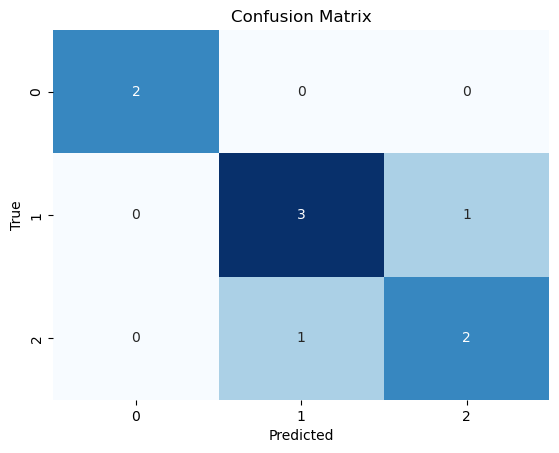

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example data (replace this with your actual data)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


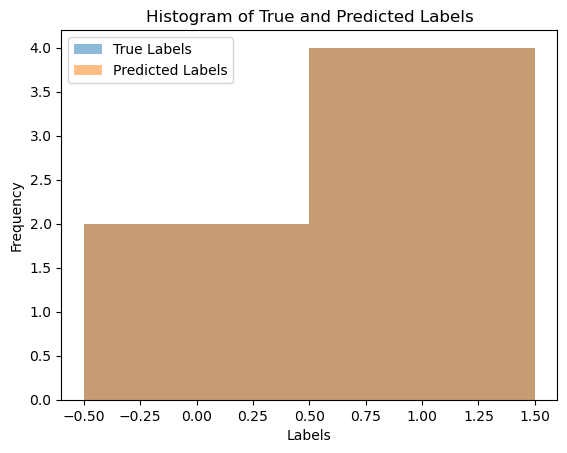

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data

# Plot histogram for true labels
plt.hist(true_labels, bins=np.unique(true_labels) - 0.5, alpha=0.5, label='True Labels')

# Plot histogram for predicted labels
plt.hist(predicted_labels, bins=np.unique(predicted_labels) - 0.5, alpha=0.5, label='Predicted Labels')

plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of True and Predicted Labels')
plt.legend()
plt.show()


In [10]:
!pip install PrettyTable

Defaulting to user installation because normal site-packages is not writeable


In [11]:
from prettytable import PrettyTable

# Example data (replace this with your actual data)
mlflow_used = True  # Set to True since MLflow is used in the provided code
tensorboard_used = False  # Set to True if you use TensorBoard or any other tool

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Tool", "Features", "Integration"]

# Add rows to the table
table.add_row(["MLflow", "Experiment tracking, artifact logging, metrics logging", mlflow_used])
table.add_row(["TensorBoard", "Interactive dashboards, metrics visualization", tensorboard_used])
# Add more rows for other tools as needed

# Print the table
print(table)


+-------------+--------------------------------------------------------+-------------+
|     Tool    |                        Features                        | Integration |
+-------------+--------------------------------------------------------+-------------+
|    MLflow   | Experiment tracking, artifact logging, metrics logging |     True    |
| TensorBoard |     Interactive dashboards, metrics visualization      |    False    |
+-------------+--------------------------------------------------------+-------------+


In [10]:
from IPython.core.display import HTML

In [3]:
pip install googletrans==4.0.0-rc1


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:

from googletrans import Translator, LANGUAGES

# working 4 with translate options in the UI
import tkinter as tk
from tkinter import Entry, Button, PhotoImage, Listbox
import speech_recognition as sr
import pyttsx3
import os
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import json
import threading
from googletrans import Translator
from datetime import datetime

# Add the following import at the beginning of the file
from speech_recognition import UnknownValueError

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load pre-trained language model (GPT-2)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# Load or collect data for training/fine-tuning (replace with your actual data loading)
with open('C:/Users/VAMSI/OneDrive/Desktop/chatbot.h5/tech.json', 'r') as file:
    data = json.load(file)

class ChatbotApp:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title(f"chitti")
        self.root.geometry('1000x800')  # Increased dimensions
        self.root.resizable(False, False)
        self.message = tk.StringVar()
        self.is_listening = False
        self.greeted = False
        self.selected_language = None

        self.textcon = tk.Text(self.root, bd=1, bg='white', width=70, height=15)  # Adjusted dimensions
        self.textcon.pack(fill="both", expand=True)

        self.mes_win = Entry(self.root, width=50, xscrollcommand=True, textvariable=self.message)
        self.mes_win.place(x=1, y=720, height=60, width=679)  # Adjusted dimensions
        self.mes_win.focus()

        self.textcon.config(fg='black')
        self.textcon.tag_config('usr', foreground='black')
        self.textcon.insert(tk.END, "chitti : This is chitti! Your Assistant.\n\n")

        self.exit_list = ['goodbye', 'bye', 'off']

        mic_image_path = "mic.png"
        if os.path.exists(mic_image_path):
            self.mic_image = PhotoImage(file=mic_image_path).subsample(2, 3)
        else:
            print(f"Error: Mic image not found at {mic_image_path}")
            self.mic_image = None

        self.mic_button = Button(self.root, text='Mic', bg='blue', activebackground='white',
                                 command=self.activate_mic, width=12, height=2, font=('Arial'))
        self.mic_button.place(x=800, y=720, height=60, width=110)  # Adjusted dimensions

        self.send_button = Button(self.root, text='Send', bg='pink', activebackground='grey',
                                   command=self.send_msz, width=12, height=2, font=('Arial'))
        self.send_button.place(x=680, y=720, height=60, width=110)  # Adjusted dimensions

        self.language_listbox = Listbox(self.root, selectmode=tk.SINGLE, exportselection=False)
        self.language_listbox.place(x=920, y=720, height=60, width=80)
        self.language_listbox.insert(1, "Telugu")
        self.language_listbox.insert(2, "Kannada")
        self.language_listbox.insert(3, "Tamil")
        self.language_listbox.insert(4, "Hindi")
        self.language_listbox.select_set(0)

        self.root.bind('<Return>', self.send_msz)
        self.engine = pyttsx3.init()
        self.translator = Translator()
        self.root.mainloop()

    def send_msz(self, event=None):
        usr_input = self.message.get()
        usr_input = usr_input.lower()
        self.textcon.insert(tk.END, f'You : {usr_input}' + '\n', 'usr')

        if usr_input.lower() in ["goodbye", "bye"]:
            self.textcon.config(fg='black')
            response = "Thank You sir, I hope I assisted you properly"
            self.textcon.insert(tk.END, f"chitti : {response}\n")
            self.speak(response)
            return self.root.destroy()

        elif "translate" in usr_input:
            self.speak("Sure, I can help with translation. Please select a language option.")
            self.selected_language = self.language_listbox.get(tk.ACTIVE).lower()

        else:
            self.textcon.config(fg='black')
            response = self.handle_user_input(usr_input)
            self.textcon.insert(tk.END, f"chitti: {response}\n")
            # Speak only if the input is from the microphone and not a translation request
            if hasattr(self, 'input_source') and self.input_source == 'mic' and not self.selected_language:
                self.speak(response)
            self.mes_win.delete(0, tk.END)

    def activate_mic(self):
        if self.mic_image:
            self.mic_button.config(image=self.mic_image)
        else:
            self.mic_button.config(text="Mic")

        self.is_listening = True
        threading.Thread(target=self.listen_continuously).start()

    def listen_continuously(self):
        r = sr.Recognizer()

        while self.is_listening:
            if not self.greeted:
                self.greeted = True
                self.speak("Hello sir! I am your chitti.")
                current_time = datetime.now().strftime("%I:%M %p")
                self.speak(f"The current time is {current_time}")

            engine = pyttsx3.init()
            rate = engine.getProperty('rate')
            engine.setProperty('rate', 170)
            voices = engine.getProperty('voices')
            engine.setProperty('voice', voices[1].id)

            with sr.Microphone() as source:
                r.energy_threshold = 400
                r.adjust_for_ambient_noise(source, 1.2)
                self.textcon.insert(tk.END, "chitti: Listening... \n")  # Display listening message in textcon

                try:
                    audio = r.listen(source)
                    text = r.recognize_google(audio)
                    self.textcon.insert(tk.END, f"You (Mic): {text}\n", 'usr')  # Display user's input in textcon
                    self.input_source = 'mic'

                    # Handle the user input (speech-to-text)
                    response = self.handle_user_input(text)
                    self.textcon.insert(tk.END, f"chitti: {response}\n")
                    if self.input_source == 'mic' and not self.selected_language:
                        self.speak(response)

                except UnknownValueError:
                    print("chitti: Sorry, I could not understand the audio. Please try again.")

                except sr.RequestError as e:
                    print(f"chitti: There was an error with the speech recognition service: {e}")

    def speak(self, text):
        self.engine.say(text)
        self.engine.runAndWait()

    def handle_user_input(self, user_input):
        user_keywords = self.extract_keywords(user_input)

        for example in data.get("intents", []):
            if "question" in example:
                question_keywords = [keyword for q in example["question"] for keyword in self.extract_keywords(q)]

                if all(keyword in question_keywords for keyword in user_keywords):
                    answer = example.get("answer", [])
                    return f"{answer}"

        if self.selected_language:
            # Translate the user input to English using the googletrans library
            translated_text = self.translate_text(user_input, self.selected_language, "en")

            self.speak("Here is the translation:")
            self.textcon.insert(tk.END, f"chitti: Translation: {translated_text}\n")

        else:
            input_ids = tokenizer.encode(user_input, return_tensors="tf")
            output = gpt_model.generate(input_ids, max_length=150, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95,
                                        temperature=0.7)
            bot_response = tokenizer.decode(output[0], skip_special_tokens=True)

            # Adjust the response based on the user's technical ability
            technical_ability = "tech"  # You need to get this value from somewhere
            if technical_ability == "tech":
                # Customize response for technical users
                pass
            else:
                # Customize response for non-technical users
                pass

            candidate_answers = ["Your first answer", "Your second answer", "Your third answer"]
            relevancy_scores = self.score_relevancy(user_input, candidate_answers)

            # Store or update relevancy scores for future learning
            # Update your model based on user feedback and learning algorithm

            return bot_response

    def extract_keywords(self, text):
        doc = nlp(text)
        return [token.text.lower() for token in doc if token.is_alpha]

    def score_relevancy(self, user_input, candidate_answers):
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform([user_input] + candidate_answers)
        similarity_matrix = cosine_similarity(vectors)
        relevancy_scores = similarity_matrix[0][1:]
        return relevancy_scores
    
    
    
    
    
    def translate_text(self, text, source_language, target_language):
        translator = Translator()

        if source_language not in LANGUAGES or target_language not in LANGUAGES:
            return "Invalid source or target language."

        translation = translator.translate(text, src=source_language, dest=target_language)
        translated_text = translation.text

        self.textcon.insert(tk.END, f"chitti: Translation: {translated_text}\n")
        self.speak("Here is the translation:")
        self.speak(translated_text)

        return translated_text

if __name__ == "__main__":
    chatbot_app = ChatbotApp()



All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
Exception in thread Thread-13:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VAMSI\AppData\Local\Temp\ipykernel_16356\4068595930.py", line 137, in listen_continuously
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 3743, in insert
    self.tk.call((self._w, 'insert', index, chars) + args)
RuntimeError: main thread is not in main loop


chitti: Sorry, I could not understand the audio. Please try again.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


chitti: Sorry, I could not understand the audio. Please try again.
chitti: Sorry, I could not understand the audio. Please try again.
chitti: Sorry, I could not understand the audio. Please try again.
chitti: Sorry, I could not understand the audio. Please try again.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Exception in thread Thread-38:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 917, in run
    self._targe